In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2026-01-18 04:28:38.768398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768710518.950938      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768710519.005115      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768710519.472097      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768710519.472138      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768710519.472141      55 computation_placer.cc:177] computation placer alr

In [2]:
from keras.preprocessing import image_dataset_from_directory

In [3]:
dataset = image_dataset_from_directory(
    directory = '/kaggle/input/stanford-dogs-dataset-traintest/cropped/train' ,
    shuffle = True ,
    seed = 12 ,
    image_size = [299 , 299] ,
    batch_size = 16
)

Found 12000 files belonging to 120 classes.


I0000 00:00:1768710544.117495      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1768710544.121355      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
len(dataset)

750

In [5]:
name = dataset.class_names

In [6]:
name

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [7]:
len(name)

120

In [8]:
train_df = image_dataset_from_directory(
    directory = '/kaggle/input/stanford-dogs-dataset-traintest/cropped/train' ,
    shuffle = True ,
    seed = 12 ,
    image_size = [299 , 299] ,
    batch_size = 16
)

Found 12000 files belonging to 120 classes.


In [9]:
test_df = image_dataset_from_directory(
    directory = '/kaggle/input/stanford-dogs-dataset-traintest/cropped/test' ,
    shuffle = True ,
    seed = 12 ,
    image_size = [299 , 299] ,
    batch_size = 16
)

Found 8580 files belonging to 120 classes.


In [10]:
len(test_df)

537

In [11]:
len(train_df)

750

In [12]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_df = train_df.map(lambda x,y: (preprocess_input(x), y))
test_df   = test_df.map(lambda x,y: (preprocess_input(x), y))

In [32]:
from keras.applications import InceptionV3

In [33]:
base_model = InceptionV3(
    include_top = False ,
    input_shape = (299 , 299 , 3) ,
    weights= 'imagenet'
)

In [34]:
base_model.trainable = False

In [35]:
from keras.models import *
from keras.layers import *

In [36]:
input = Input(shape = (299 , 299 , 3))

x = base_model(input )

d = GlobalAveragePooling2D()(x)

d0 = Dense(1024 , activation = 'relu')(d)

d1 = Dropout(0.3)(d0)

d2 = Dense(512 , activation = 'relu')(d1)

d3 = Dense(120 , activation = 'softmax')(d2)

In [37]:
model = Model(inputs = input , outputs = d3)

In [38]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        61,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,487,320 (93.41 MB)

 Trainable params: 2,684,536 (10.24 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [39]:
from keras.losses import *
from keras.optimizers import *

In [40]:
model.compile(optimizer = Adam(1e-3) , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False) , metrics = ['accuracy'])

In [41]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [42]:
es = EarlyStopping(patience = 3 , monitor = 'val_loss' , mode = 'min' , restore_best_weights = True )

In [43]:
ls = ReduceLROnPlateau(factor = 0.4 , patience = 3 , monitor = 'val_loss' , mode = 'min')

In [44]:
model.fit(train_df , validation_data = test_df , epochs = 5 , callbacks = [es , ls] , batch_size = 16 , verbose = 1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 116ms/step - accuracy: 0.5946 - loss: 1.8312 - val_accuracy: 0.8321 - val_loss: 0.5683 - learning_rate: 0.0010
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.8380 - loss: 0.5385 - val_accuracy: 0.8584 - val_loss: 0.4746 - learning_rate: 0.0010
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.8603 - loss: 0.4418 - val_accuracy: 0.8575 - val_loss: 0.4899 - learning_rate: 0.0010
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.8658 - loss: 0.4045 - val_accuracy: 0.8650 - val_loss: 0.4574 - learning_rate: 0.0010
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.8872 - loss: 0.3571 - val_accuracy: 0.8720 - val_loss: 0.4584 - learning_rate: 0.0010


In [48]:
for layer in base_model.layers[-80:]:
  layer.trainable = True

In [49]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 120)            │        61,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,856,394 (113.89 MB)

 Trainable params: 15,348,792 (58.55 MB)

 Non-trainable params: 9,138,528 (34.86 MB)

 Optimizer params: 5,369,074 (20.48 MB)

In [50]:
model.compile(optimizer = Adam(1e-5) , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False) , metrics = ['accuracy'])

In [56]:
model.fit(train_df , validation_data = test_df , epochs = 10 , batch_size = 16 , verbose = 1 )

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9006 - loss: 0.2940 - val_accuracy: 0.9015 - val_loss: 0.3689
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9140 - loss: 0.2650 - val_accuracy: 0.9021 - val_loss: 0.3690
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9196 - loss: 0.2537 - val_accuracy: 0.9012 - val_loss: 0.3724
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9168 - loss: 0.2529 - val_accuracy: 0.9006 - val_loss: 0.3722
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9213 - loss: 0.2357 - val_accuracy: 0.9017 - val_loss: 0.3723
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9277 - loss: 0.2242 - val_accuracy: 0.9015 - val_loss: 0.3755
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9298 - loss: 0.2185 - val_accuracy: 0.9012 - val_loss: 0.3777
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.9318 - loss: 0

In [57]:
model.evaluate(test_df)

537/537 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - accuracy: 0.8980 - loss: 0.4119


[0.3797045648097992, 0.9003496766090393]

In [33]:
import json

raw_class_names = name   # your current list

clean_class_names = [
    name.split("-")[1].replace("_", " ").title()
    for name in raw_class_names
]

with open("day_7_dog_class_names.json", "w") as f:
    json.dump(clean_class_names, f)


In [59]:
model.save('day_7_stanford_model.keras')
model.save('day_7_stanford_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


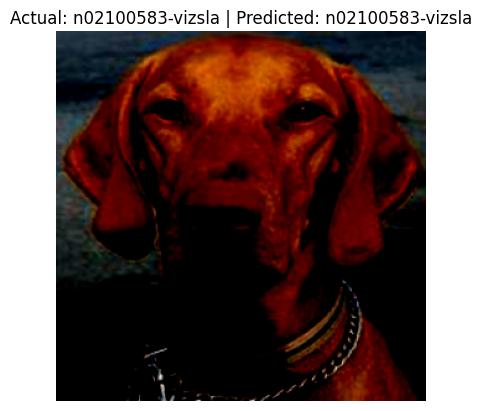

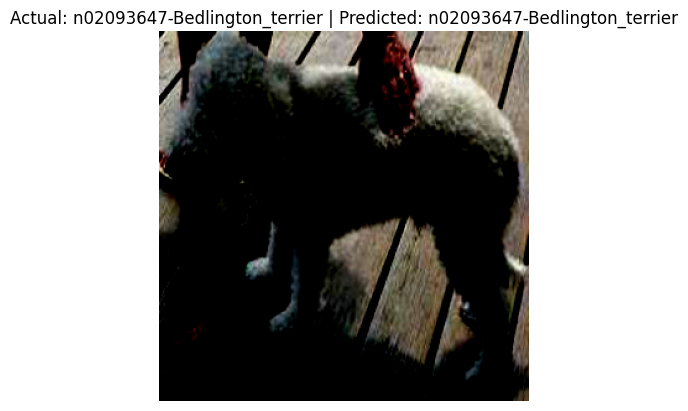

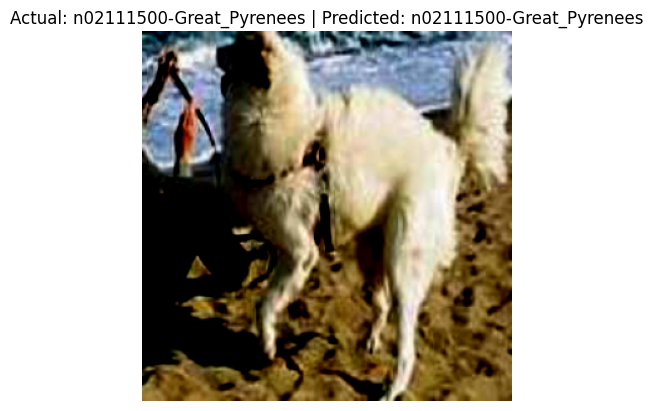

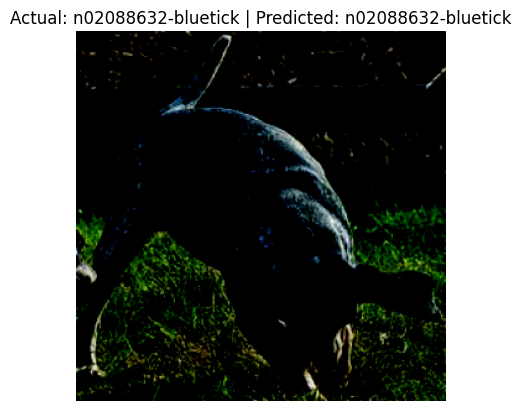

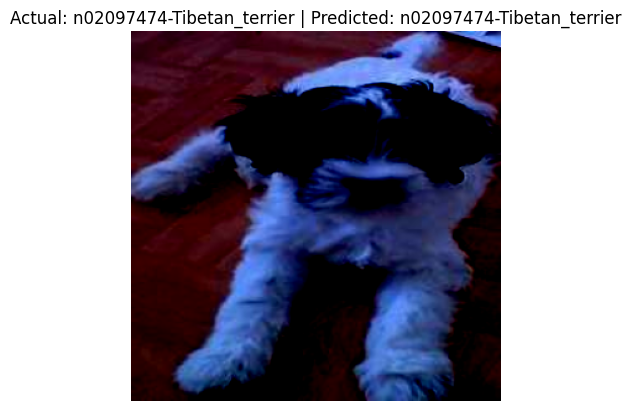

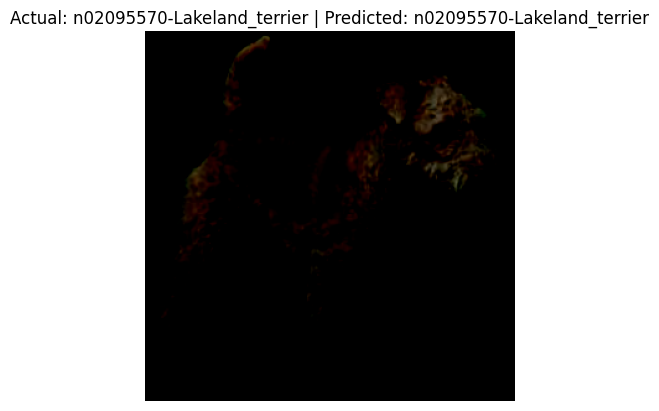

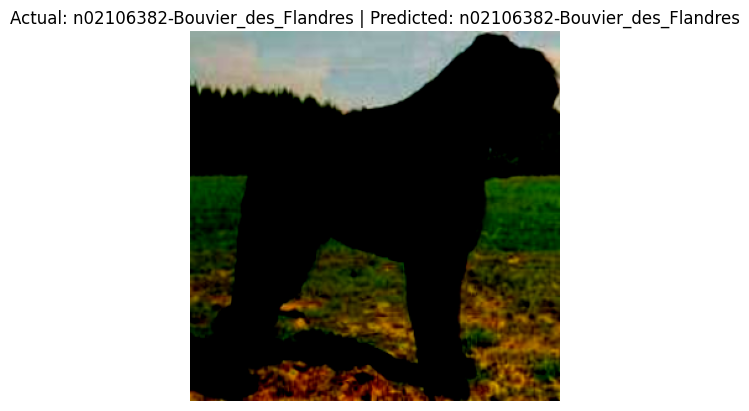

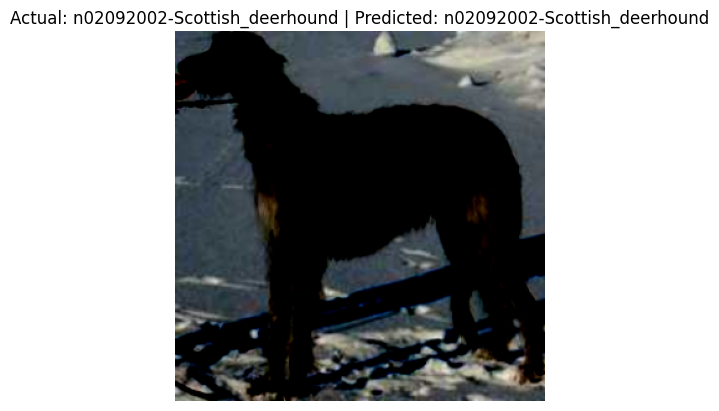

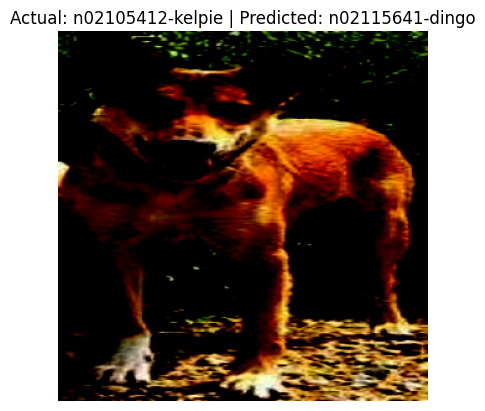

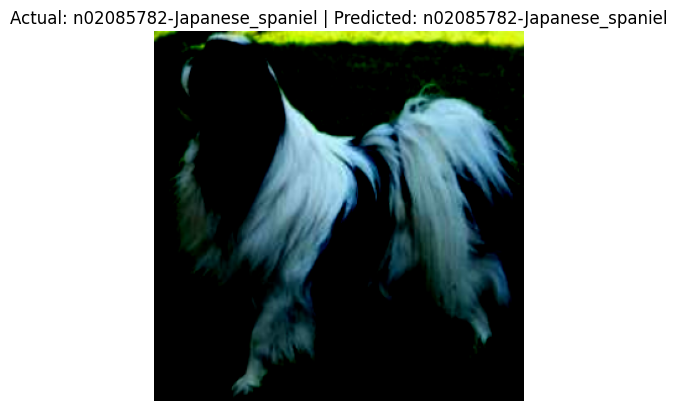

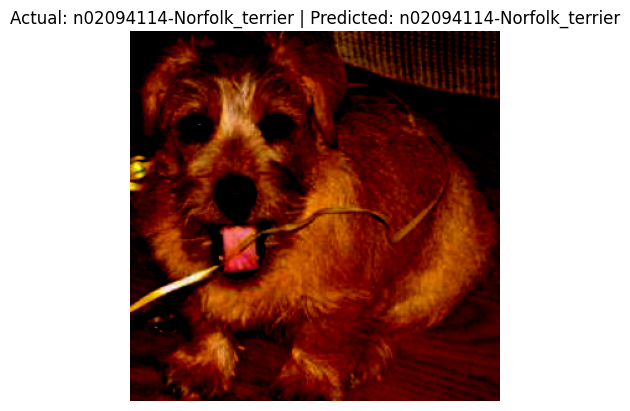

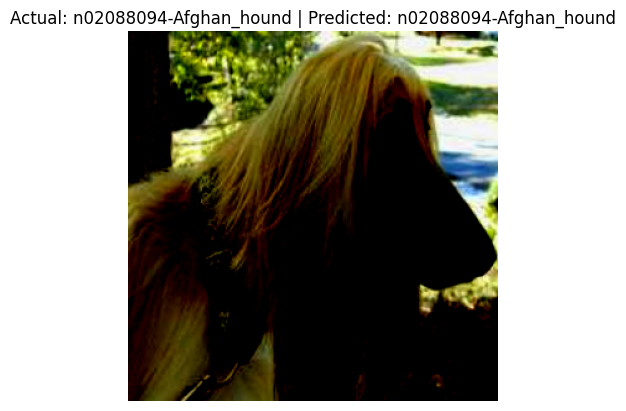

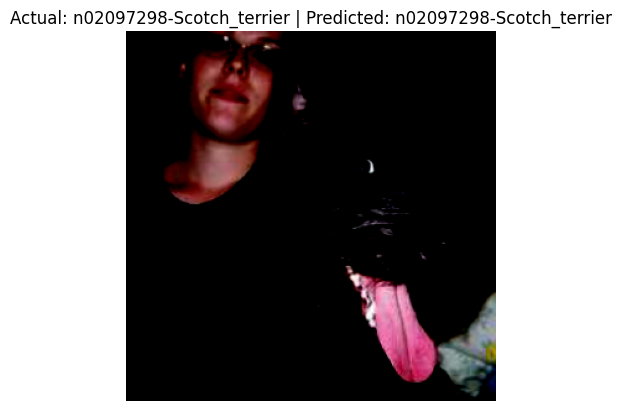

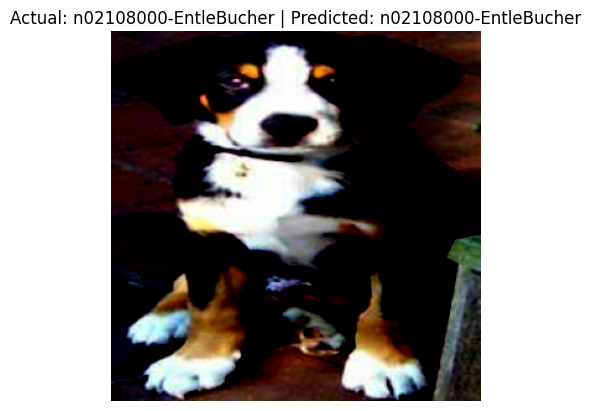

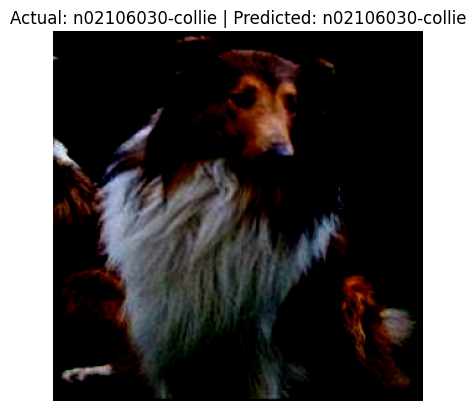

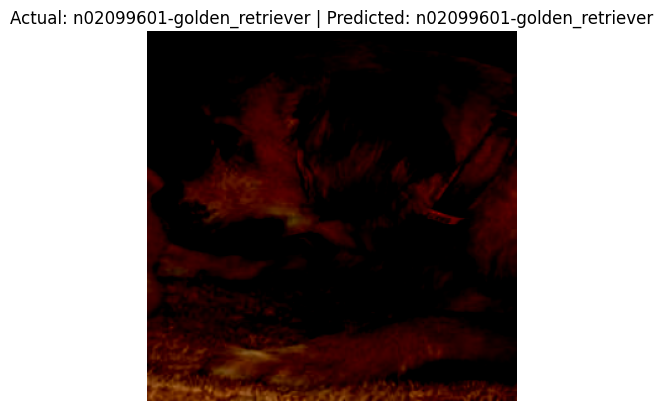

Total Samples = 16
Correct Predictions = 15
Final Accuracy = 0.9375


In [62]:
# Checking Code for a Test

import matplotlib.pyplot as plt
import numpy as np

correct = 0
total = 0

for images, labels in test_df.take(1):   # test_df = your test dataset
    # Predict on the batch
    preds = model.predict(images)

    # Loop through each image inside the batch
    for i in range(len(images)):
        actual_label = name[int(labels[i].numpy())]
        predicted_class = np.argmax(preds[i])
        predicted_label = name[predicted_class]

        # Accuracy count
        if actual_label == predicted_label:
            correct += 1
        total += 1

        # Show image + prediction
        plt.imshow(images[i].numpy())
        plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
        plt.axis("off")
        plt.show()

# FINAL ACCURACY
print("Total Samples =", total)
print("Correct Predictions =", correct)
print("Final Accuracy =", correct / total)